In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score   # For Cross Validation
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sns

In [67]:
df = pd.read_csv('/content/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [68]:
X = df.drop('medv', axis=1)      # data of the dataset
y = df['medv']                   # target of the dataset
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [69]:
# Train Test Split
X_train, X_test, y_train , y_test = train_test_split(X,y,train_size = 0.30, random_state=43)


In [76]:
# Standardizaton of data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [77]:
# Linear Regression
#cross validation
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [78]:
mse = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error',cv = 5)
np.mean(mse)                # lower the value, better the model

-27.668732844379356

In [79]:
# Prediction
reg_pred = regression.predict(X_train)
reg_pred

array([20.51433093, 35.61534877, 27.77800674, 16.75178809, 30.40708069,
       33.6233043 , 25.97421739, 25.46330664, 11.76354258, 23.13017073,
       12.64909739, 32.96715446, 19.17640786,  8.08669868, 30.02038503,
       38.15440225, 16.1926943 ,  9.25032009, 16.41318967, 33.43754667,
       28.6375972 , 26.25861044, 19.14050383, 14.0107539 , 17.66767015,
       14.87975488, 20.2162866 , 35.22432848, 27.31024201, 25.71010294,
       27.40207401, 30.33586   , 23.99781731, 28.43641832, 28.02495703,
       11.78736454, 18.99948413, 32.89929878, 36.42795231, 23.60294443,
       26.42757245, 15.20234804, 28.15045782, 11.29137628, 22.18020674,
       24.06989839, 22.7763197 , 29.2794946 ,  9.03619128, 35.01763265,
       18.6747444 , 30.18586413, 19.00502607, 13.04689959, 13.38757267,
       34.20237571, 28.58637458, 26.10811039, 19.89919539, 30.49046956,
       15.22112664, 12.52250396, 25.16062937, 17.84298749, 40.0475733 ,
       17.26343786, 38.97893922, 25.2317096 , 19.36347343,  6.46

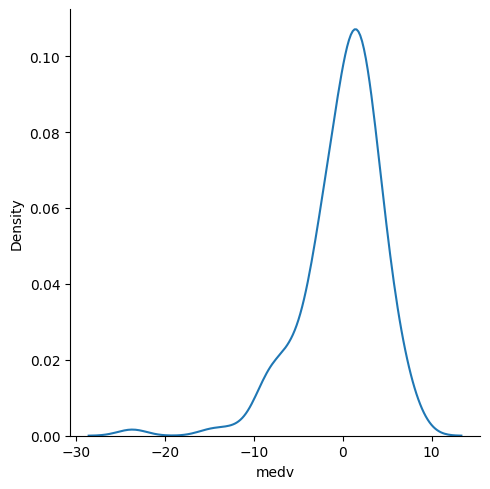

In [80]:
sns.displot(reg_pred-y_train, kind ='kde')              # this means that the difference between the predicted and the training data is less which is very good

In [81]:
score = r2_score(reg_pred,y_train)
score

0.7242655050305531